In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score
from PrepareDataset import PrepareDataset

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv', header=0)

In [3]:
dataset = PrepareDataset(data)
dataset = dataset.early_preparation()
dataset = dataset.set_rows_to_zeros()
dataset = dataset.split_power()
dataset = dataset.standard_scaled_dataset()

In [4]:
train_dataset = dataset.train()
val_dataset = dataset.val()
test_dataset = dataset.test()

In [5]:
tf.random.set_seed(10)
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape=(11, 1)))
model.add(GRU(64, activation='relu'))
model.add(Dense(1))

In [6]:
model.compile(loss='mse', optimizer=Adam(0.001))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 11, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 22,241
Trainable params: 22,241
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
model_checkpoint = ModelCheckpoint('GRUModel.h5', verbose=0, save_best_only=True)

In [9]:
model.fit(train_dataset[0], train_dataset[1], epochs=100, validation_data=(val_dataset[0], val_dataset[1]),
                                              callbacks=[early_stopping, model_checkpoint], batch_size=2, verbose=0)

In [10]:
model.load_weights('GRUModel.h5')

In [11]:
predictions = model.predict(test_dataset[0], verbose=0)[:,0]

In [12]:
print(f'R^2 score: {round(r2_score(test_dataset[1], predictions), 3)}')
print(f'R score: {round(np.sqrt(r2_score(test_dataset[1], predictions)), 3)}')

R^2 score: 0.778
R score: 0.882


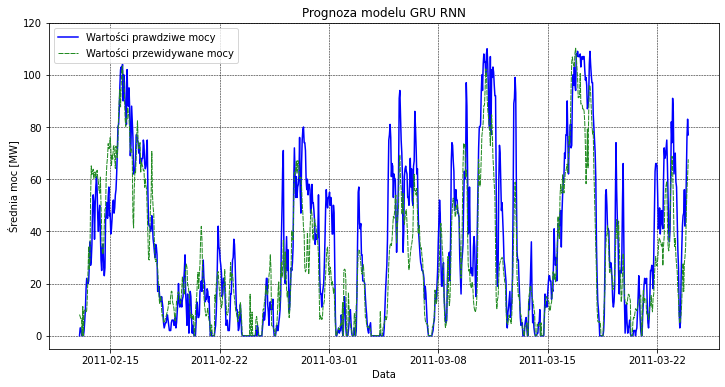

In [13]:
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], test_dataset[1], color='blue', label='Wartości prawdziwe mocy', linewidth=1.5)
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], predictions, color='forestgreen',
                                                                     linestyle=(0, (5, 1)), label='Wartości przewidywane mocy', linewidth=1)
fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([-5, 120])
plt.ticklabel_format(axis='y', style='plain')
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.title('Prognoza modelu GRU RNN')
plt.xlabel('Data')
plt.ylabel('Średnia moc [MW]')
plt.legend(loc='best')
plt.show()

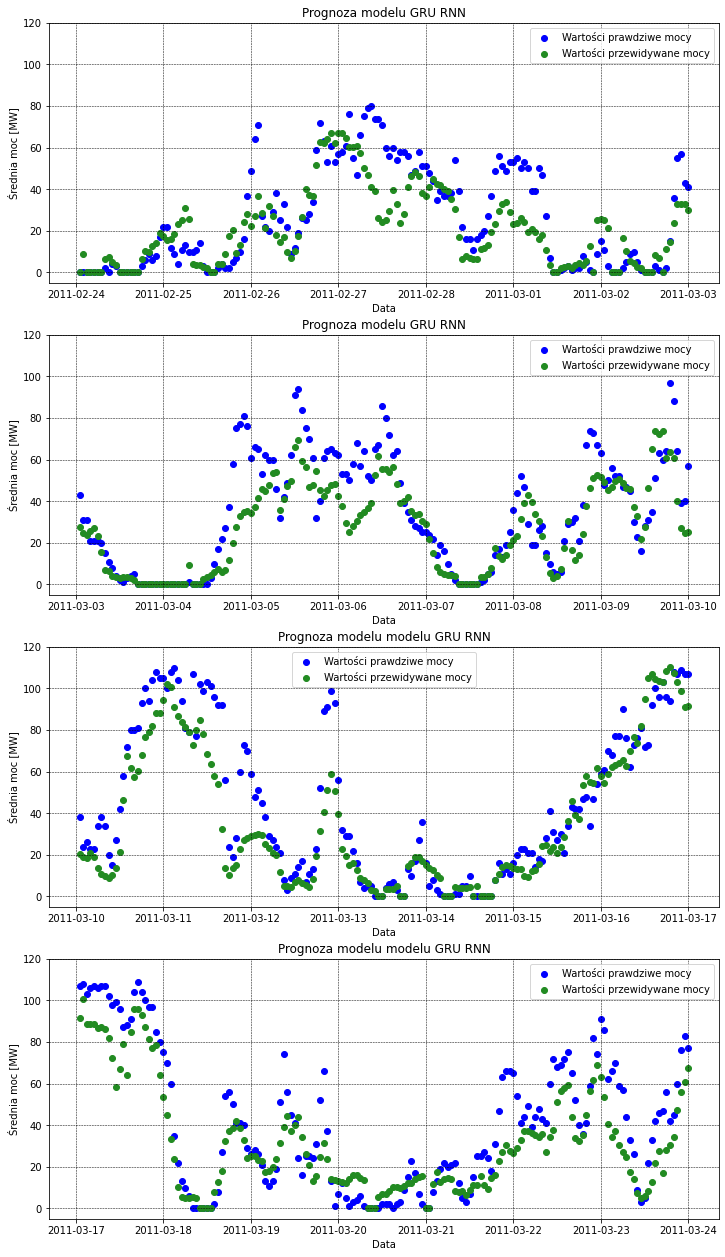

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(12,22))
ax3.scatter(dataset.date_time[-168:], test_dataset[1][-168:], color='blue', label='Wartości prawdziwe mocy')
ax3.scatter(dataset.date_time[-168:], predictions[-168:], color='forestgreen', label='Wartości przewidywane mocy')
ax3.set_ylim([-5, 120])
ax3.ticklabel_format(axis='y', style='plain')
ax3.grid(color='k', linewidth=0.5, linestyle='--')
ax3.set_title('Prognoza modelu modelu GRU RNN')
ax3.set_xlabel('Data')
ax3.set_ylabel('Średnia moc [MW]')
ax3.legend(loc='best')

ax2.scatter(dataset.date_time[-336:-168], test_dataset[1][-336:-168], color='blue', label='Wartości prawdziwe mocy')
ax2.scatter(dataset.date_time[-336:-168], predictions[-336:-168], color='forestgreen', label='Wartości przewidywane mocy')
ax2.set_ylim([-5, 120])
ax2.ticklabel_format(axis='y', style='plain')
ax2.grid(color='k', linewidth=0.5, linestyle='--')
ax2.set_title('Prognoza modelu modelu GRU RNN')
ax2.set_xlabel('Data')
ax2.set_ylabel('Średnia moc [MW]')
ax2.legend(loc='best')

ax1.scatter(dataset.date_time[-504:-336], test_dataset[1][-504:-336], color='blue', label='Wartości prawdziwe mocy')
ax1.scatter(dataset.date_time[-504:-336], predictions[-504:-336], color='forestgreen', label='Wartości przewidywane mocy')
ax1.set_ylim([-5, 120])
ax1.ticklabel_format(axis='y', style='plain')
ax1.grid(color='k', linewidth=0.5, linestyle='--')
ax1.set_title('Prognoza modelu GRU RNN')
ax1.set_xlabel('Data')
ax1.set_ylabel('Średnia moc [MW]')
ax1.legend(loc='best')

ax0.scatter(dataset.date_time[-672:-504], test_dataset[1][-672:-504], color='blue', label='Wartości prawdziwe mocy')
ax0.scatter(dataset.date_time[-672:-504], predictions[-672:-504], color='forestgreen', label='Wartości przewidywane mocy')
ax0.set_ylim([-5, 120])
ax0.ticklabel_format(axis='y', style='plain')
ax0.grid(color='k', linewidth=0.5, linestyle='--')
ax0.set_title('Prognoza modelu GRU RNN')
ax0.set_xlabel('Data')
ax0.set_ylabel('Średnia moc [MW]')
ax0.legend(loc='best')

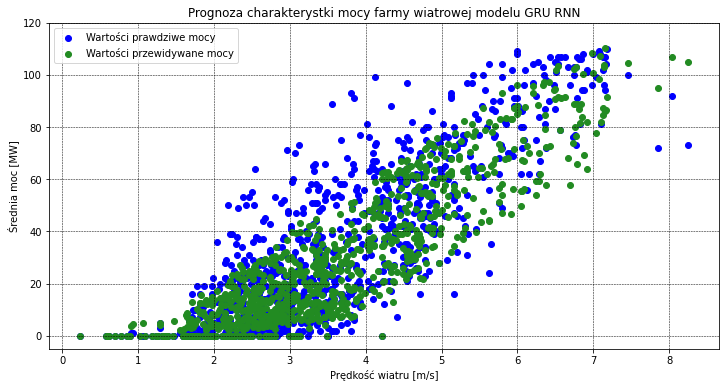

In [15]:
plt.scatter(dataset.wind_speed[int(dataset.lenght * 0.9):], test_dataset[1], color='blue', label='Wartości prawdziwe mocy')
plt.scatter(dataset.wind_speed[int(dataset.lenght * 0.9):], predictions, color='forestgreen', label='Wartości przewidywane mocy')
fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([-5, 120])
plt.ticklabel_format(axis='y', style='plain')
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.title('Prognoza charakterystki mocy farmy wiatrowej modelu GRU RNN')
plt.xlabel('Prędkość wiatru [m/s]')
plt.ylabel('Średnia moc [MW]')
plt.legend(loc='best')
plt.show()